In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline


In [25]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2905,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,Fiscal,2014,6,General Administration & Finance,ASR,ASR Assessor / Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,...,4222,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,Fiscal,2014,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2910,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,Fiscal,2014,1,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,...,H002,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",1600,...,1224,Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [26]:
test_df = pd.read_csv('test.csv')
test_df.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits
0,9240,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,"Lab, Pharmacy & Med Techs",2454,Clinical Pharmacist,23148,0.0,0.00,0.00,2203.32,2014.12,4217.44
1,209951,Fiscal,2016,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,8789,0.0,1689.53,31464.76,11872.83,9947.92,53285.51
2,29879,Fiscal,2016,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3610,Library Assistant,48290,0.0,932.77,8858.22,9705.96,3764.93,22329.11
3,177914,Fiscal,2015,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1824,Pr Administrative Analyst,43253,0.0,0.00,23955.61,11687.19,8880.83,44523.63
4,180406,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2900,Human Services,2930,Psychiatric Social Worker,13722,0.0,620.54,20644.61,12384.59,7491.65,40520.85


In [27]:
train_df.describe()

,ID,Year,Organization Group Code,Union Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
count,149087.000000,149087.000000,149087.00000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000,149087.000000
mean,106616.273807,2015.072018,2.97698,491.154963,28508.984465,4511.488439,3754.638895,12632.395320,9058.531893,4720.552627,26411.479840,2.014347
std,61550.046783,1.410452,1.58208,333.914881,16460.652590,11361.792998,7516.445237,9657.913757,5024.486147,3933.772085,16893.424789,0.816750
min,0.000000,2013.000000,1.00000,1.000000,1.000000,-12308.660000,-19131.100000,-28723.190000,-2946.530000,-9857.740000,-19814.440000,1.000000
25%,53204.500000,2014.000000,2.00000,216.000000,14244.000000,0.000000,0.000000,3228.975000,4274.930000,1578.475000,9313.965000,1.000000
50%,106623.000000,2015.000000,2.00000,535.000000,28520.000000,0.000000,698.350000,12839.710000,12137.400000,4395.510000,30311.560000,2.000000
75%,159919.500000,2016.000000,4.00000,790.000000,42804.500000,2872.240000,4558.190000,19137.745000,12828.180000,6943.835000,38510.300000,3.000000
max,213201.000000,2017.000000,7.00000,990.000000,56987.000000,227313.620000,336726.340000,101306.010000,22052.150000,36815.390000,138503.520000,3.000000


In [28]:
train_df.shape

(149087, 21)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 21 columns):
ID                         149087 non-null int64
Year Type                  149087 non-null object
Year                       149087 non-null int64
Organization Group Code    149087 non-null int64
Organization Group         149087 non-null object
Department Code            149087 non-null object
Department                 149087 non-null object
Union Code                 149087 non-null int64
Union                      149087 non-null object
Job Family Code            149087 non-null object
Job Family                 149087 non-null object
Job Code                   149087 non-null object
Job                        149087 non-null object
Employee Identifier        149087 non-null int64
Overtime                   149087 non-null float64
Other Salaries             149087 non-null float64
Retirement                 149087 non-null float64
Health/Dental              149087 non-nul

In [30]:
train_df.isnull().sum()

ID                         0
Year Type                  0
Year                       0
Organization Group Code    0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family Code            0
Job Family                 0
Job Code                   0
Job                        0
Employee Identifier        0
Overtime                   0
Other Salaries             0
Retirement                 0
Health/Dental              0
Other Benefits             0
Total Benefits             0
Class                      0
dtype: int64

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 21 columns):
ID                         149087 non-null int64
Year Type                  149087 non-null object
Year                       149087 non-null int64
Organization Group Code    149087 non-null int64
Organization Group         149087 non-null object
Department Code            149087 non-null object
Department                 149087 non-null object
Union Code                 149087 non-null int64
Union                      149087 non-null object
Job Family Code            149087 non-null object
Job Family                 149087 non-null object
Job Code                   149087 non-null object
Job                        149087 non-null object
Employee Identifier        149087 non-null int64
Overtime                   149087 non-null float64
Other Salaries             149087 non-null float64
Retirement                 149087 non-null float64
Health/Dental              149087 non-nul

In [32]:
test_df.isnull().sum()

ID                         0
Year Type                  0
Year                       0
Organization Group Code    0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family Code            0
Job Family                 0
Job Code                   0
Job                        0
Employee Identifier        0
Overtime                   0
Other Salaries             0
Retirement                 0
Health/Dental              0
Other Benefits             0
Total Benefits             0
dtype: int64

In [34]:
train_new = train_df.drop(['Year Type', 'Organization Group', 'Department', 'Union', 'Job Family', 'Job'], axis=1)

In [36]:
train_new.head()

,ID,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,2017,3,DSS,535,2900,2905,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,2014,6,ASR,21,4200,4222,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,2014,3,DSS,535,2900,2910,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,2014,1,FIR,798,H000,H002,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,2013,2,MTA,790,1600,1224,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [35]:
test_new = test_df.drop(['Year Type', 'Organization Group', 'Department', 'Union', 'Job Family', 'Job'], axis=1)

In [37]:
test_new.head()

,ID,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits
0,9240,2015,4,DPH,790,2400,2454,23148,0.0,0.00,0.00,2203.32,2014.12,4217.44
1,209951,2016,4,DPH,791,2300,2328,8789,0.0,1689.53,31464.76,11872.83,9947.92,53285.51
2,29879,2016,5,LIB,790,3600,3610,48290,0.0,932.77,8858.22,9705.96,3764.93,22329.11
3,177914,2015,1,POL,21,1800,1824,43253,0.0,0.00,23955.61,11687.19,8880.83,44523.63
4,180406,2015,4,DPH,790,2900,2930,13722,0.0,620.54,20644.61,12384.59,7491.65,40520.85


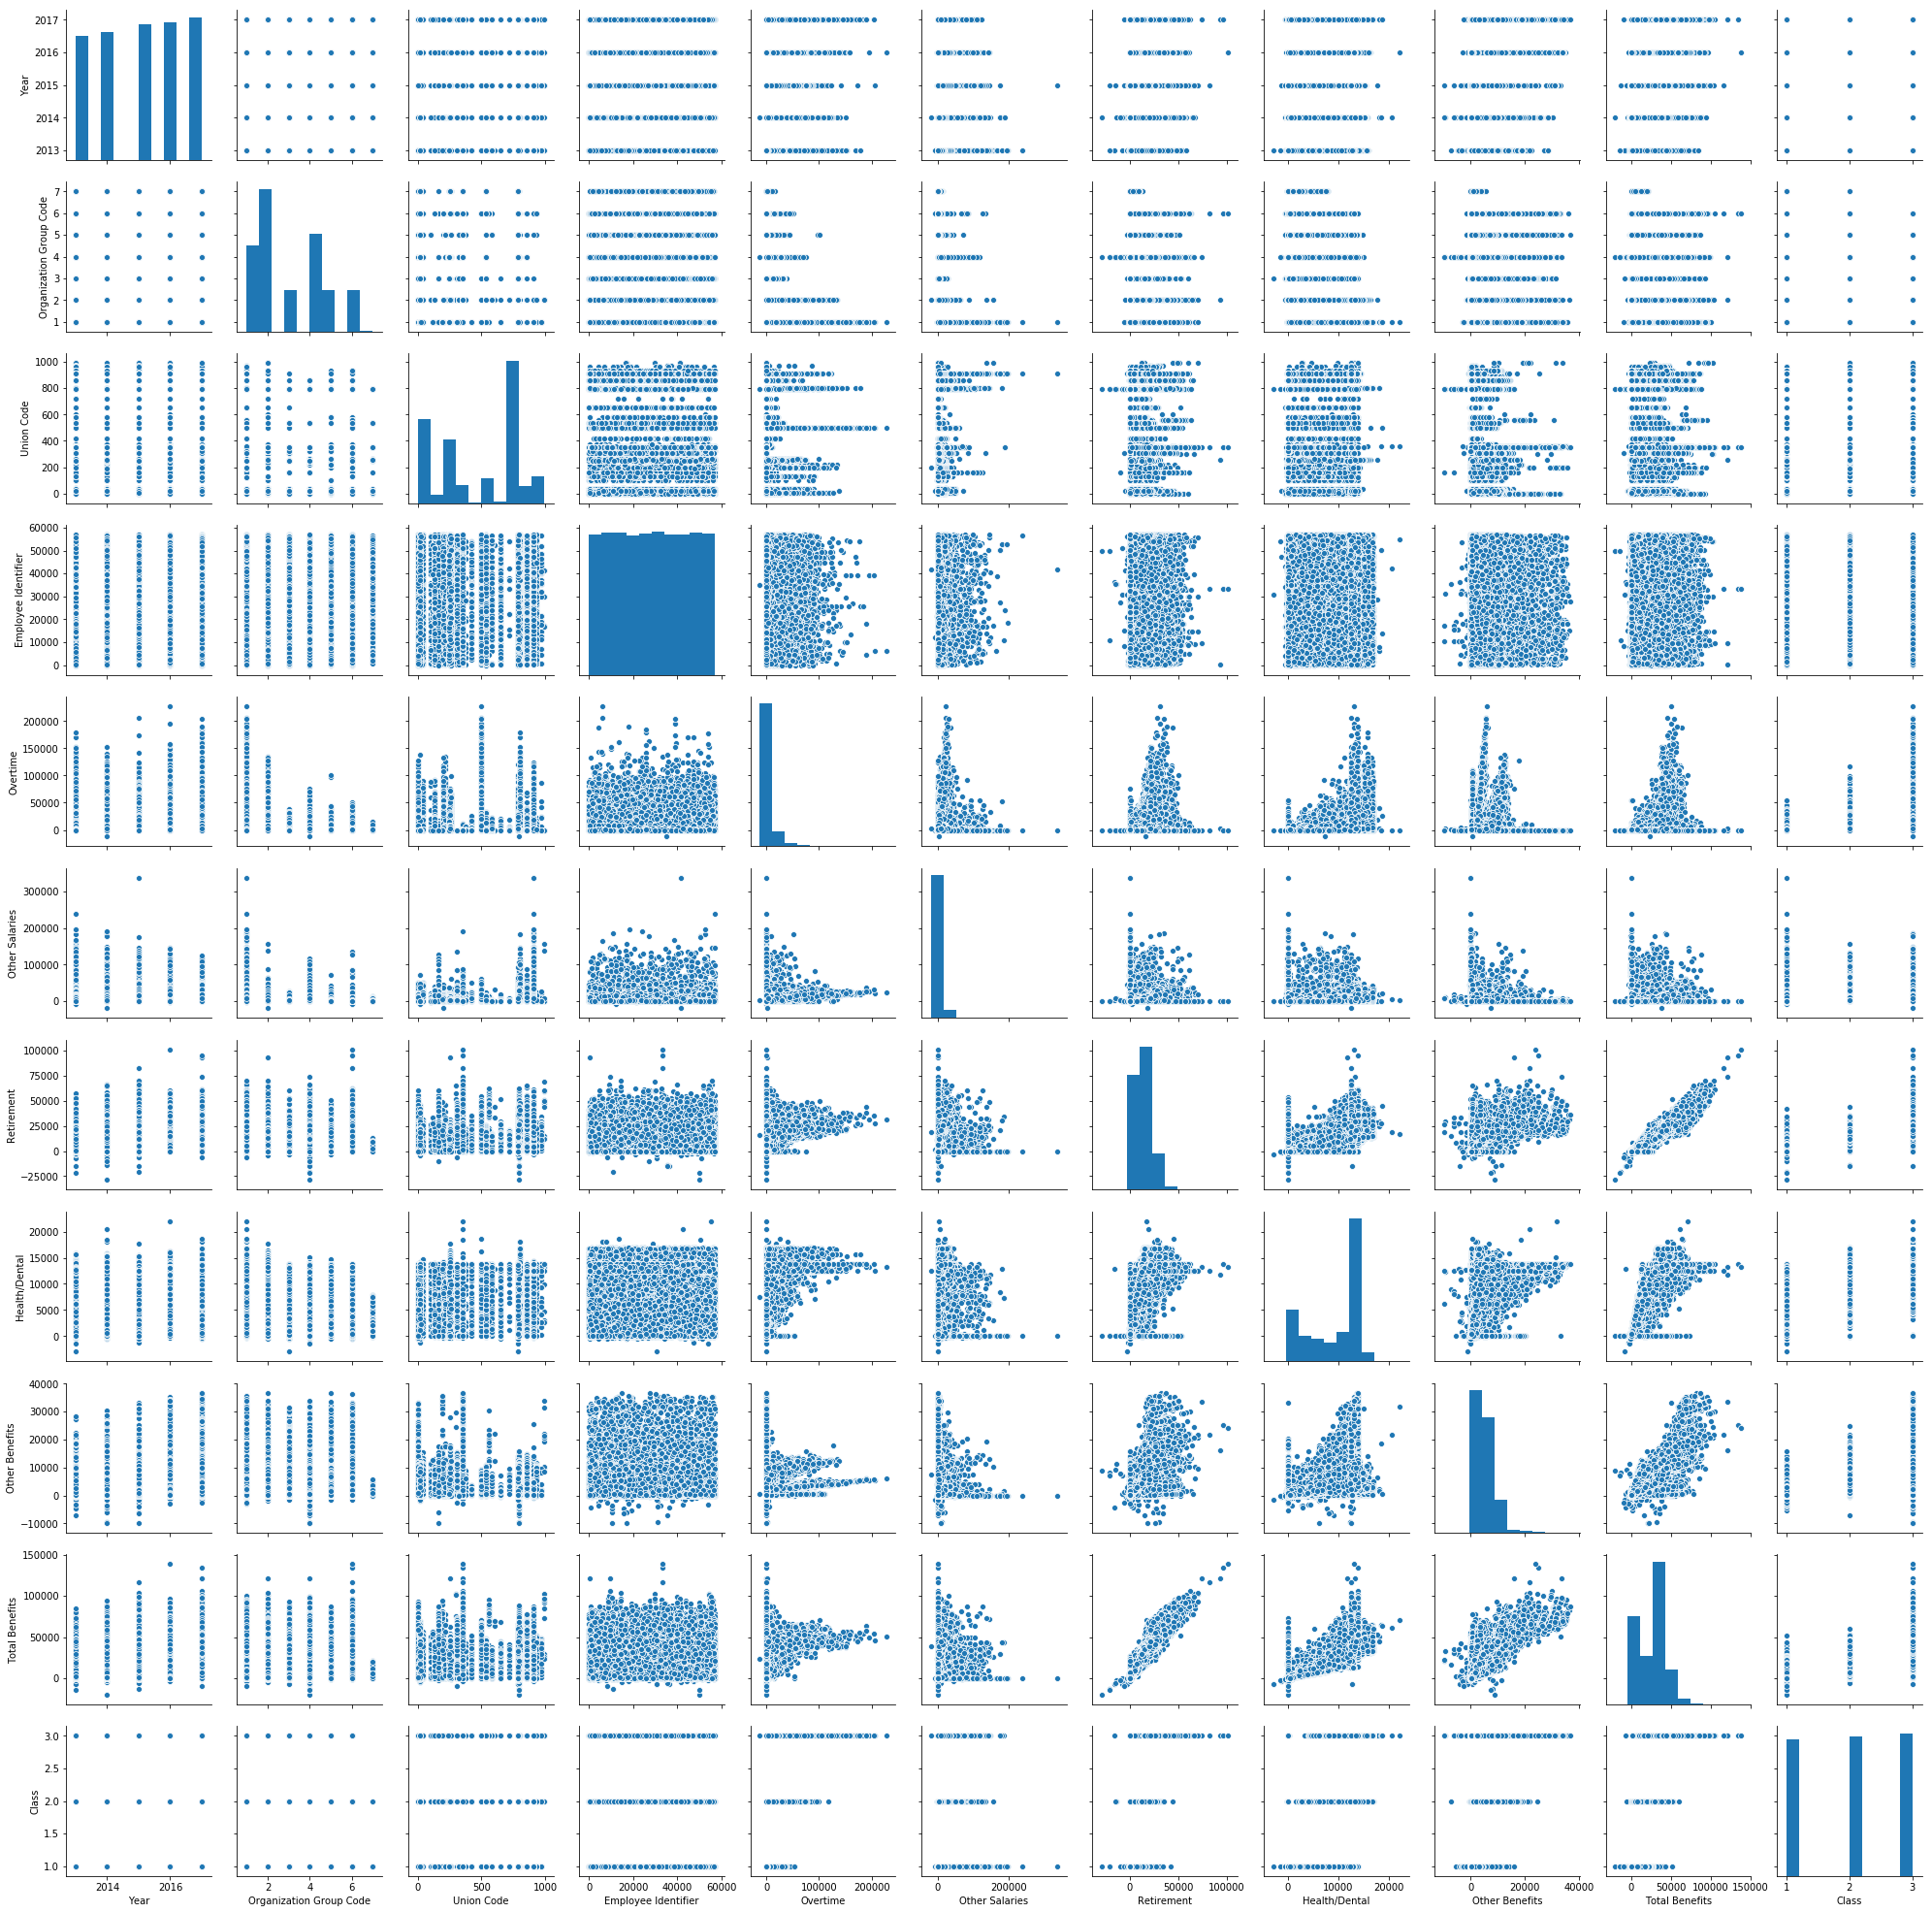

In [38]:
sns.pairplot(train_new.iloc[:,1:])

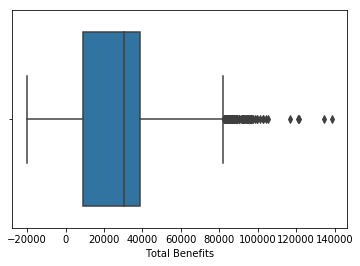

In [39]:
sns.boxplot(train_new['Total Benefits'])   # No outliers in Age Feature

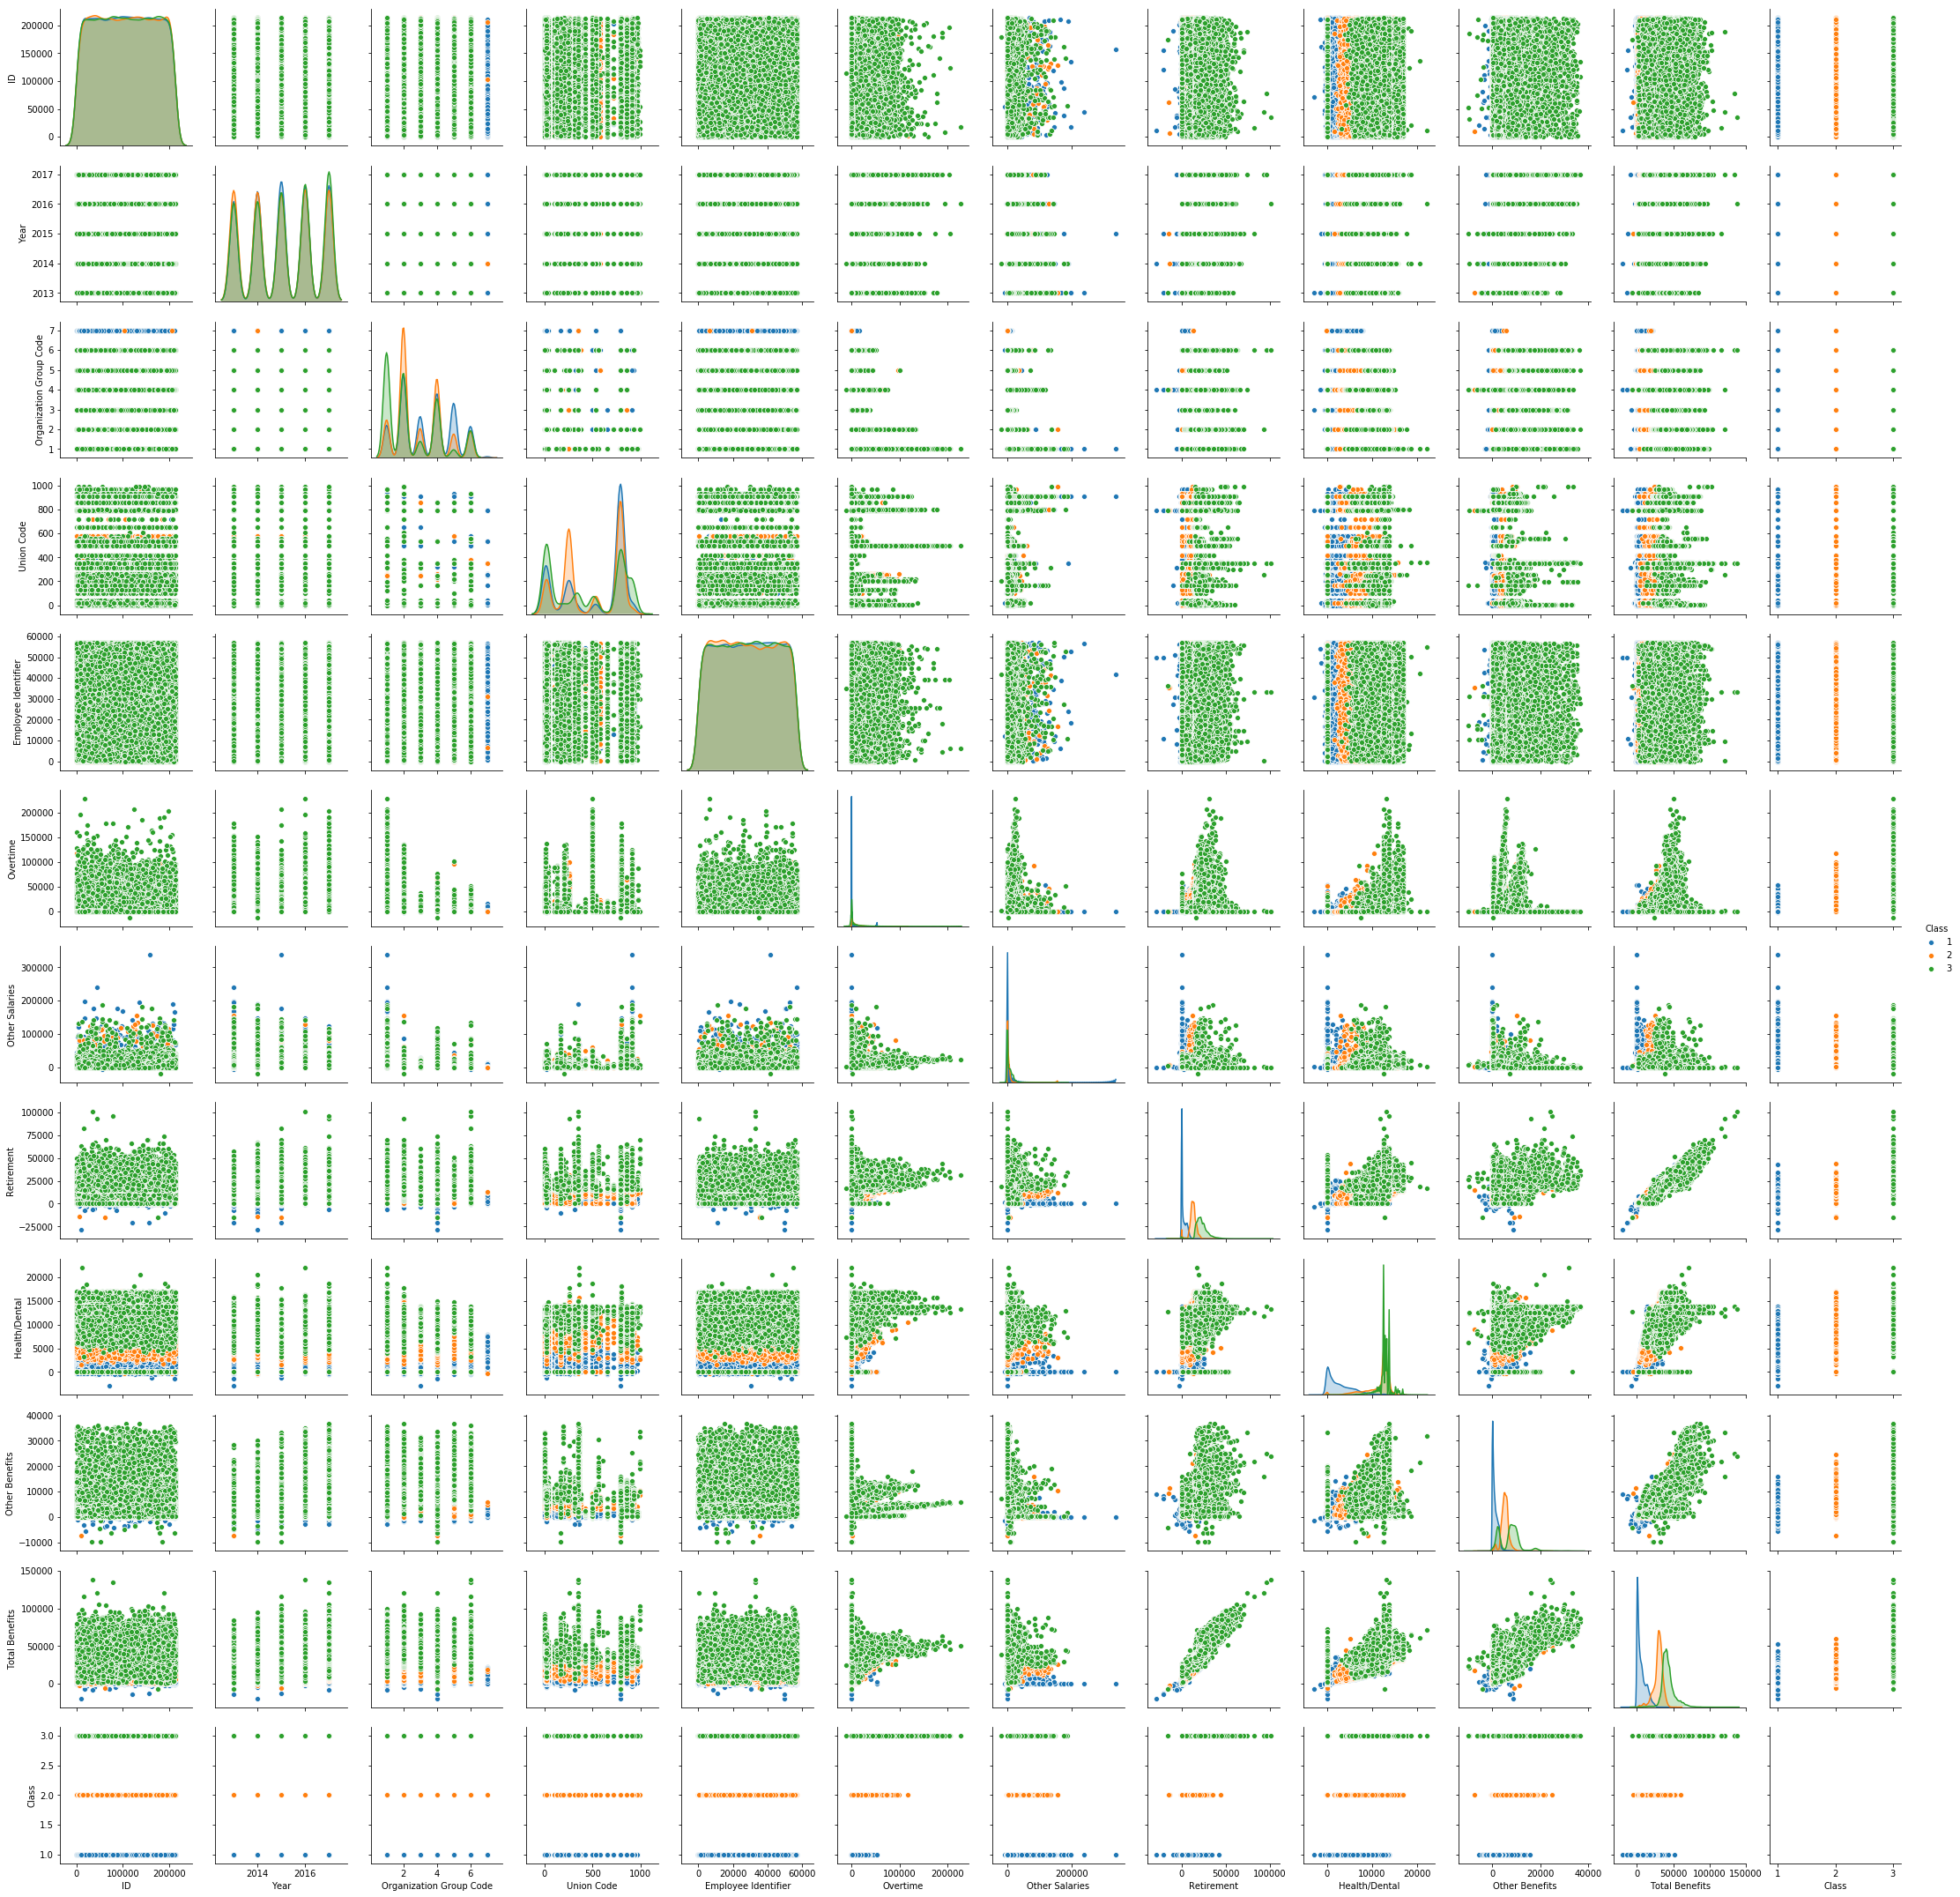

In [40]:
sns.pairplot(train_new, hue = "Class")

In [41]:
train_new_sklearn = train_new.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_new_sklearn['DCE'] = lb_make.fit_transform(train_new['Department Code'])
train_new_sklearn['UCE'] = lb_make.fit_transform(train_new['Union Code'])
train_new_sklearn['JFCE'] = lb_make.fit_transform(train_new['Job Family Code'])
train_new_sklearn['JCE'] = lb_make.fit_transform(train_new['Job Code'])

train_new_sklearn.head() #using Label encoding

,ID,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class,DCE,UCE,JFCE,JCE
0,9248,2017,3,DSS,535,2900,2905,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2,22,48,18,373
1,44541,2014,6,ASR,21,4200,4222,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2,5,8,25,509
2,47031,2014,3,DSS,535,2900,2910,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2,22,48,18,377
3,139416,2014,1,FIR,798,H000,H002,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3,28,58,53,1096
4,123780,2013,2,MTA,790,1600,1224,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3,37,54,6,60


In [44]:
train_new_sklearn = train_new_sklearn.drop(['Department Code', 'Union Code', 'Job Family Code', 'Job Code'], axis=1)

In [45]:
train_new_sklearn.head()

,ID,Year,Organization Group Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class,DCE,UCE,JFCE,JCE
0,9248,2017,3,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2,22,48,18,373
1,44541,2014,6,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2,5,8,25,509
2,47031,2014,3,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2,22,48,18,377
3,139416,2014,1,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3,28,58,53,1096
4,123780,2013,2,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3,37,54,6,60


In [47]:
train_new_sklearn = train_new_sklearn[['ID', 'Year','Organization Group Code', 'Employee Identifier', 'Overtime','Other Salaries','Retirement','Health/Dental','Other Benefits','Total Benefits','DCE','UCE','JFCE','JCE','Class']]

In [48]:
train_new_sklearn.head()

,ID,Year,Organization Group Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,DCE,UCE,JFCE,JCE,Class
0,9248,2017,3,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,22,48,18,373,2
1,44541,2014,6,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,5,8,25,509,2
2,47031,2014,3,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,22,48,18,377,2
3,139416,2014,1,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,28,58,53,1096,3
4,123780,2013,2,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,37,54,6,60,3


In [63]:
train_new_sklearn.dtypes

ID                           int64
Year                         int64
Organization Group Code      int64
Employee Identifier          int64
Overtime                   float64
Other Salaries             float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
DCE                          int32
UCE                          int64
JFCE                         int32
JCE                          int32
Class                        int64
dtype: object

In [53]:
array = train_new_sklearn.values
X = array[:,:14]  # select all rows and select columns from 2nd to 14th which are the independent attributes
Y = array[:,14]    # select all rows and the 6th column which is the dependent column 'Class'

In [55]:
print (Y)

[2. 2. 2. ... 3. 1. 3.]


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [67]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [68]:
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00000838e+00 -8.52357585e-04  1.09252002e-03  1.43323636e-03
  -2.57403587e-03 -1.48819459e-03 -3.09304992e-03 -3.22553864e-03
  -3.47826125e-03 -3.53810924e-03 -2.78281760e-03 -3.99944305e-04
  -1.39731347e-03 -6.45886042e-04]
 [-8.52357585e-04  1.00000838e+00 -3.78776778e-03 -9.19402662e-04
   2.67381833e-02 -1.04517893e-02  2.61325670e-03  4.78943178e-02
   5.74291695e-02  2.90945284e-02  5.19331154e-04  2.25971500e-03
  -3.29089407e-03  1.47796769e-03]
 [ 1.09252002e-03 -3.78776778e-03  1.00000838e+00 -5.00770235e-03
  -3.01853277e-01 -2.25769355e-01 -2.43432017e-01 -2.31687847e-01
   2.15630653e-02 -2.03150007e-01 -2.30423366e-01 -3.30529877e-02
  -5.26668842e-01 -4.31619409e-01]
 [ 1.43323636e-03 -9.19402662e-04 -5.00770235e-03  1.00000838e+00
   3.94821322e-03  5.15553965e-03  4.76325999e-03  2.09195224e-03
  -7.40456164e-04  3.17526662e-03  3.95717984e-03  1.06324326e-03
   8.38175881e-03  4.46938388e-03]
 [-2.57403587e-03  2.67381833e-02 -3.01853277e

In [69]:
eig_vals, eig_vecs = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.76137436e-03 -2.51676153e-04  4.69070351e-04 -6.62449287e-04
  -1.11243115e-03 -1.07695925e-03  2.48574804e-03  1.81209580e-03
  -5.89232927e-03  1.87104885e-02 -3.64449331e-01 -6.51520112e-01
  -6.65051291e-01 -1.24131287e-17]
 [-2.25692680e-02 -1.63890256e-02  1.15573743e-03  4.57186449e-02
   2.70745969e-02 -4.50838691e-02 -6.13839170e-02  6.56312056e-02
   5.69605864e-02 -8.20129270e-03  8.27925631e-01 -5.40308896e-01
   7.47204448e-02  3.58601525e-16]
 [ 2.18331593e-01 -3.53315678e-01  6.11729243e-02  1.54182737e-02
   3.04895841e-01 -4.64933779e-01  6.84741258e-01 -1.73913333e-01
  -1.08157068e-01 -5.24623751e-02  2.33853102e-02 -1.58161818e-02
   5.55789157e-03 -1.15629716e-17]
 [-3.63845582e-03  6.30970473e-03 -2.53327709e-03 -1.95739926e-03
  -1.93832626e-03  3.93414383e-03  2.26406323e-03 -3.23461983e-03
  -1.87145714e-03 -8.37610821e-03 -4.11021548e-01 -5.28461381e-01
   7.42709951e-01  3.76171728e-17]
 [-2.54808253e-01  2.35207980e-01  2.80497057e-02 

In [70]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort(reverse= True)


print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(3.7413848158489147, array([ 0.00276137, -0.02256927,  0.21833159, -0.00363846, -0.25480825,
       -0.22450789, -0.47525989, -0.44272552, -0.35536439, -0.48625119,
       -0.05218068,  0.01795841, -0.18126997, -0.12634872])), (2.571260735612933, array([-2.51676153e-04, -1.63890256e-02, -3.53315678e-01,  6.30970473e-03,
        2.35207980e-01,  1.57633056e-01, -1.29242048e-01, -1.61379549e-01,
       -3.08789211e-01, -1.93780604e-01,  2.77727068e-01,  1.99905295e-01,
        4.95678730e-01,  5.06209602e-01])), (1.1402788973370654, array([ 0.0018121 ,  0.06563121, -0.17391333, -0.00323462, -0.25176124,
       -0.54391181, -0.04957761, -0.01985673,  0.21349691,  0.0154082 ,
        0.02541648, -0.64416232,  0.2889367 ,  0.24179141])), (1.003685661178716, array([-3.64449331e-01,  8.27925631e-01,  2.33853102e-02, -4.11021548e-01,
        4.62668243e-02, -2.42885511e-02, -3.88390548e-02,  1.43396407e-02,
        9.96061342e-03, -1.56459390e-02,  2.70424576e-02,  8.00406710e-02,
       -1.7

In [71]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.72395319  45.08994731  53.23472829  60.40385147  67.55006653
  74.68223515  81.07861076  86.81579863  91.29699118  95.61798557
  97.77403656  99.08496838 100.         100.        ]


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=5 , weights = 'distance')
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import copy
import matplotlib.pyplot as plt 

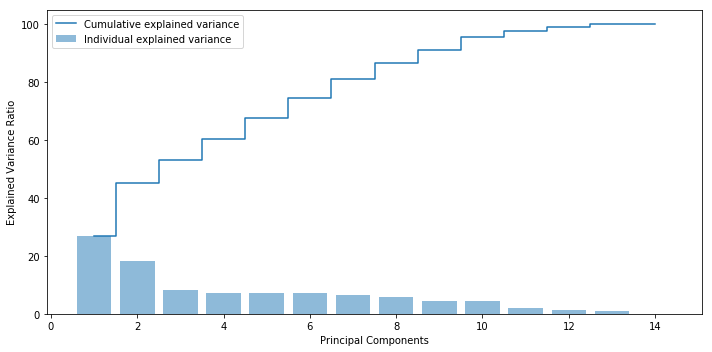

In [76]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
P_reduce = np.array(eigvectors_sorted[0:11])   # Using all principal components

Proj_data_2D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

In [89]:
X_train_std.shape, P_reduce.shape, Proj_data_2D.shape

((119269, 14), (10, 14), (119269, 10))

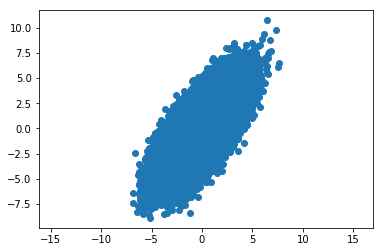

In [92]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(14, 14), rng.randn(14, 119269)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [98]:
pca = PCA(n_components=11)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [99]:
print(pca.components_)

[[ 0.20548721  0.25277561  0.3216172   0.19948367  0.26299056  0.30359675
   0.31279377  0.27878249  0.26888919  0.29776397  0.16742121  0.24724809
   0.26996967  0.30123682]
 [ 0.06481405  0.33690334 -0.28294351 -0.3082766   0.27412691  0.28660074
  -0.15876261  0.06168299 -0.26711562 -0.17377721  0.31095822 -0.42681695
  -0.03011767  0.37360917]
 [-0.06001371 -0.49663516 -0.05614223 -0.17726202  0.14868638  0.05906209
   0.00114293 -0.54327007  0.4070546   0.26320006  0.11427073 -0.17246937
   0.07702486  0.33276782]
 [ 0.21163292 -0.08668596  0.26154575  0.04885251  0.02553839  0.29903953
  -0.53959606  0.14919755  0.00138669  0.47154895 -0.06545666 -0.18111327
  -0.42245493 -0.18838403]
 [ 0.47777767  0.00110866  0.27816323 -0.22534182 -0.33850468 -0.23663523
   0.13527832 -0.26492372 -0.38285865  0.15849818  0.44518167  0.11442037
  -0.02485483  0.03013601]
 [ 0.19223433  0.1410273  -0.35453827 -0.16646992  0.2048388  -0.13698017
   0.25868883 -0.08922802 -0.19588613  0.36010115 -

In [100]:
print(pca.explained_variance_)

[48.95080351  4.10286627  3.72749593  1.64127492  1.56764651  1.15462783
  0.94171631  0.67839199  0.51051323  0.39837304  0.23300102]


In [101]:
print(pca.explained_variance_)

[48.95080351  4.10286627  3.72749593  1.64127492  1.56764651  1.15462783
  0.94171631  0.67839199  0.51051323  0.39837304  0.23300102]


In [104]:
pca = PCA(n_components=11)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (119269, 14)
transformed shape: (119269, 11)


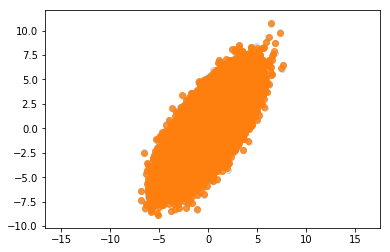

In [105]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_pca, y_train)

In [109]:
X_test_transform = sc.transform(X_test)

In [ ]:
X_test_pca = pca.transform(X_test_transform)

In [ ]:
y_predict = rfcl.predict(test_set)
print(rfcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))